In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

import scipy.stats as stats
import pylab


from numpy import isnan
from sklearn.impute import KNNImputer

In [2]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv(r"D:\360DigitIntern\Docs\Data Set\Data Set (3)\Pharma Bounce Rate.csv")

data.info()

data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     29 non-null     object 
 1   Patient_ID      29 non-null     int64  
 2   Specialisation  29 non-null     object 
 3   Dept            29 non-null     object 
 4   Dateofbill      29 non-null     object 
 5   Quantity        29 non-null     int64  
 6   ReturnQuantity  29 non-null     int64  
 7   Final_Cost      29 non-null     float64
 8   Final_Sales     29 non-null     float64
 9   RtnMRP          29 non-null     float64
 10  Formulation     28 non-null     object 
 11  DrugName        25 non-null     object 
 12  SubCat          25 non-null     object 
 13  SubCat1         25 non-null     object 
dtypes: float64(3), int64(3), object(8)
memory usage: 3.3+ KB


,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,2.900000e+01,29.00,29.00,29.00,29.00,29.00
mean,1.201810e+10,2.17,0.38,149.03,364.02,18.70
std,1.632504e+04,3.73,1.52,244.14,800.43,65.89
min,1.201807e+10,0.00,0.00,40.34,0.00,0.00
25%,1.201808e+10,1.00,0.00,47.15,48.40,0.00
50%,1.201810e+10,1.00,0.00,49.96,81.10,0.00
75%,1.201811e+10,2.00,0.00,73.36,193.60,0.00
max,1.201812e+10,20.00,8.00,959.80,4004.21,330.29


In [3]:
"""##**Check for duplicates**"""

duplicate = data.duplicated()
duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [4]:
sum(duplicate)

0

In [5]:
unique = data["DrugName"].value_counts()
data1 = data.drop_duplicates()

duplicate1 = data1.duplicated()
sum(duplicate1)

0

In [6]:
"""##**Checking for missing values**"""

data1.isna().sum()

data1.dropna(inplace=True)

data1.isna().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [8]:
#autoeda
d = dtale.show(data1)
d.open_browser()

In [7]:
"""##**Converting the datatype of Date column from Object to Datetime format**"""

data1['Dateofbill'] = pd.to_datetime(data1['Dateofbill'])



In [8]:
#Sorting the date column
data1 = data1.sort_values(by='Dateofbill')
data1.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
7,Sale,12018077721,Specialisation4,Department1,2022-01-12,3,0,60.026,142.752,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
24,Sale,12018072994,Specialisation7,Department1,2022-02-13,3,0,73.364,167.580,0.0,Form1,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
26,Sale,12018086960,Specialisation4,Department1,2022-03-19,1,0,45.152,47.100,0.0,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
11,Sale,12018088348,Specialisation4,Department1,2022-04-02,20,0,231.834,1294.000,0.0,Form1,N-ACETYLCYSTEINE 1000MG/5ML INJ,INJECTIONS,RESPIRATORY SYSTEM


In [9]:
# dropping Typeofsales and Patient_ID, since it is not required
data1 = data1.drop(["Typeofsales", "Patient_ID"], axis =1)

<Axes: >

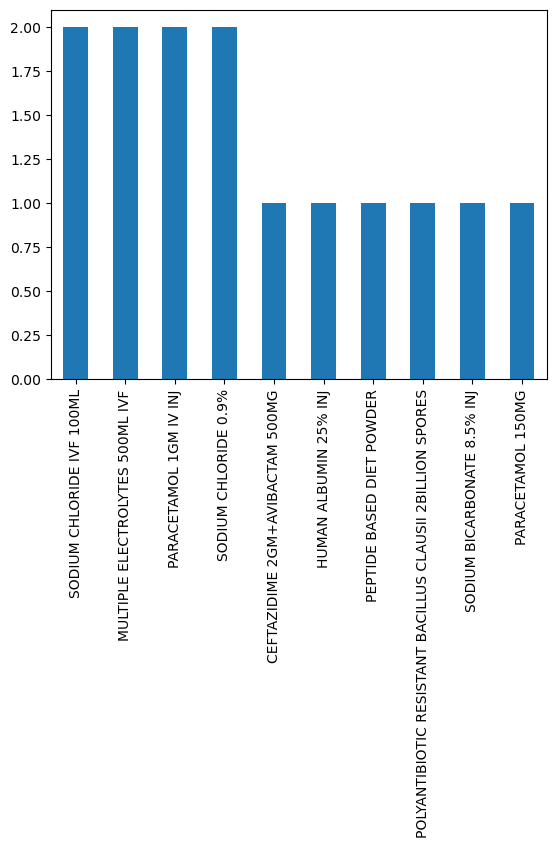

In [10]:
data1['DrugName'].value_counts().head(10).plot(kind = 'bar')

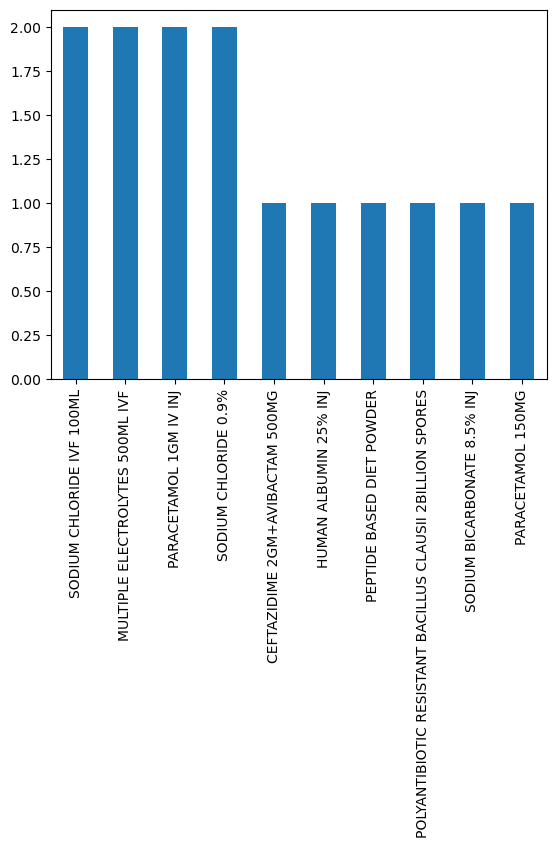

In [13]:
data1['DrugName'].value_counts().head(10).plot(kind = 'bar')
data1 = data1[["Dateofbill","Quantity", "DrugName"]]
data1 = data1.set_index('Dateofbill')
data1.index = pd.to_datetime(data1.index)
grouped_data = data1.groupby('DrugName')


In [14]:
grouped_data

In [15]:
# Forecasting For Top 5 drugs

A = grouped_data.get_group('SODIUM CHLORIDE IVF 100ML')
A1 = grouped_data.get_group('MULTIPLE ELECTROLYTES 500ML IVF')
A2 = grouped_data.get_group('PARACETAMOL 1GM IV INJ')
A3 = grouped_data.get_group('SODIUM CHLORIDE 0.9%')
#A4 = grouped_data.get_group('N-ACETYLCYSTEINE 1000MG/5ML INJ')


'\nA4 = A4[["Quantity"]]\nA4.rename(columns = {"Quantity" : "N-ACETYLCYSTEINE 1000MG/5ML INJ"}, inplace=True)\nA4 = A4.resample(\'M\').sum()\nA4.plot()\n'

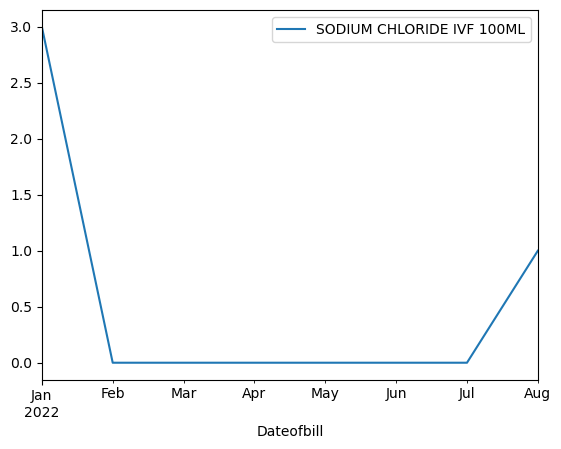

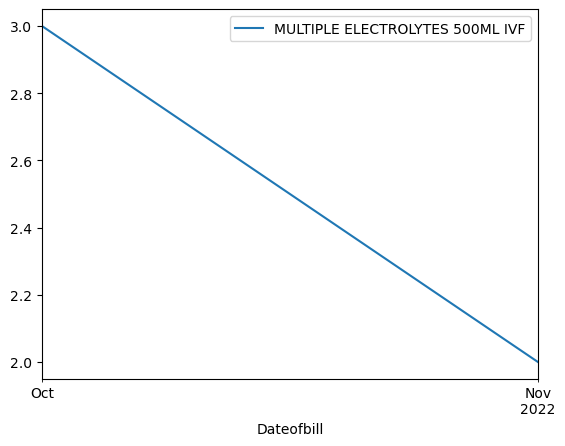

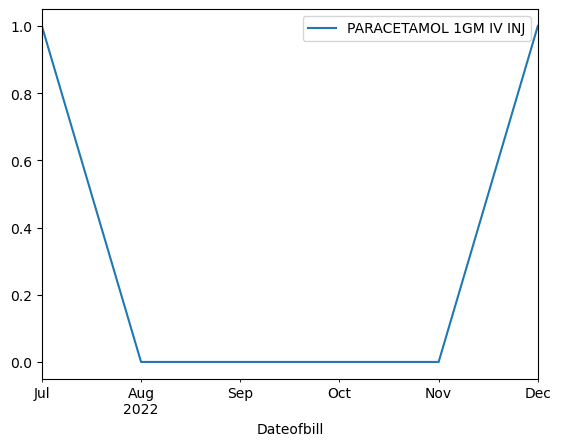

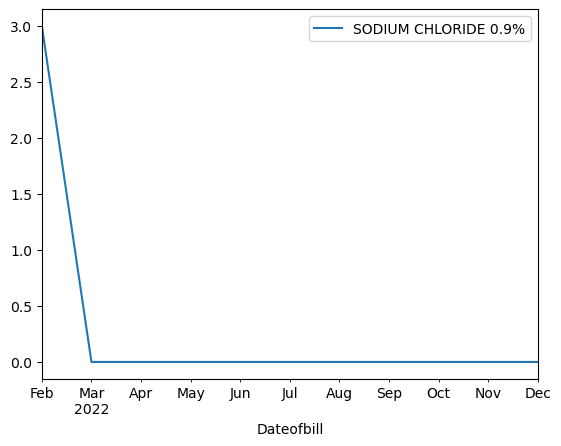

In [16]:
A = A[["Quantity"]]
A.rename(columns = {"Quantity" : "SODIUM CHLORIDE IVF 100ML"}, inplace=True)
A = A.resample('M').sum()
A.plot()

A1 = A1[["Quantity"]]
A1.rename(columns = {"Quantity" : "MULTIPLE ELECTROLYTES 500ML IVF"}, inplace=True)
A1 = A1.resample('M').sum()
A1.plot()

A2 = A2[["Quantity"]]
A2.rename(columns = {"Quantity" : "PARACETAMOL 1GM IV INJ"}, inplace=True)
A2 = A2.resample('M').sum()
A2.plot()

A3 = A3[["Quantity"]]
A3.rename(columns = {"Quantity" : "SODIUM CHLORIDE 0.9%"}, inplace=True)
A3 = A3.resample('M').sum()
A3.plot()

'''
A4 = A4[["Quantity"]]
A4.rename(columns = {"Quantity" : "N-ACETYLCYSTEINE 1000MG/5ML INJ"}, inplace=True)
A4 = A4.resample('M').sum()
A4.plot()
'''

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [18]:
A

,Quantity,DrugName
Dateofbill,,
2022-01-12,3,SODIUM CHLORIDE IVF 100ML
2022-08-11,1,SODIUM CHLORIDE IVF 100ML


In [19]:
adf_test(A['Quantity'])

ValueError: sample size is too short to use selected regression component

In [19]:
adf_test(A1)

ValueError: sample size is too short to use selected regression component

In [20]:
adf_test(A2)


ADF Statistics: -2.23606797749979
p- value: 0.19341617825473173
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
adf_test(A3)


ADF Statistics: -3.2225135712778084e+16
p- value: 0.0
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\Users\91984\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning:

divide by zero encountered in log



In [22]:
adf_test(A4)

NameError: name 'A4' is not defined

In [23]:
def decompose(df):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    # result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend = 'freq',  period=1)
    result_add = seasonal_decompose(df, model = 'additive', extrapolate_trend='freq',  period=1)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return  result_add

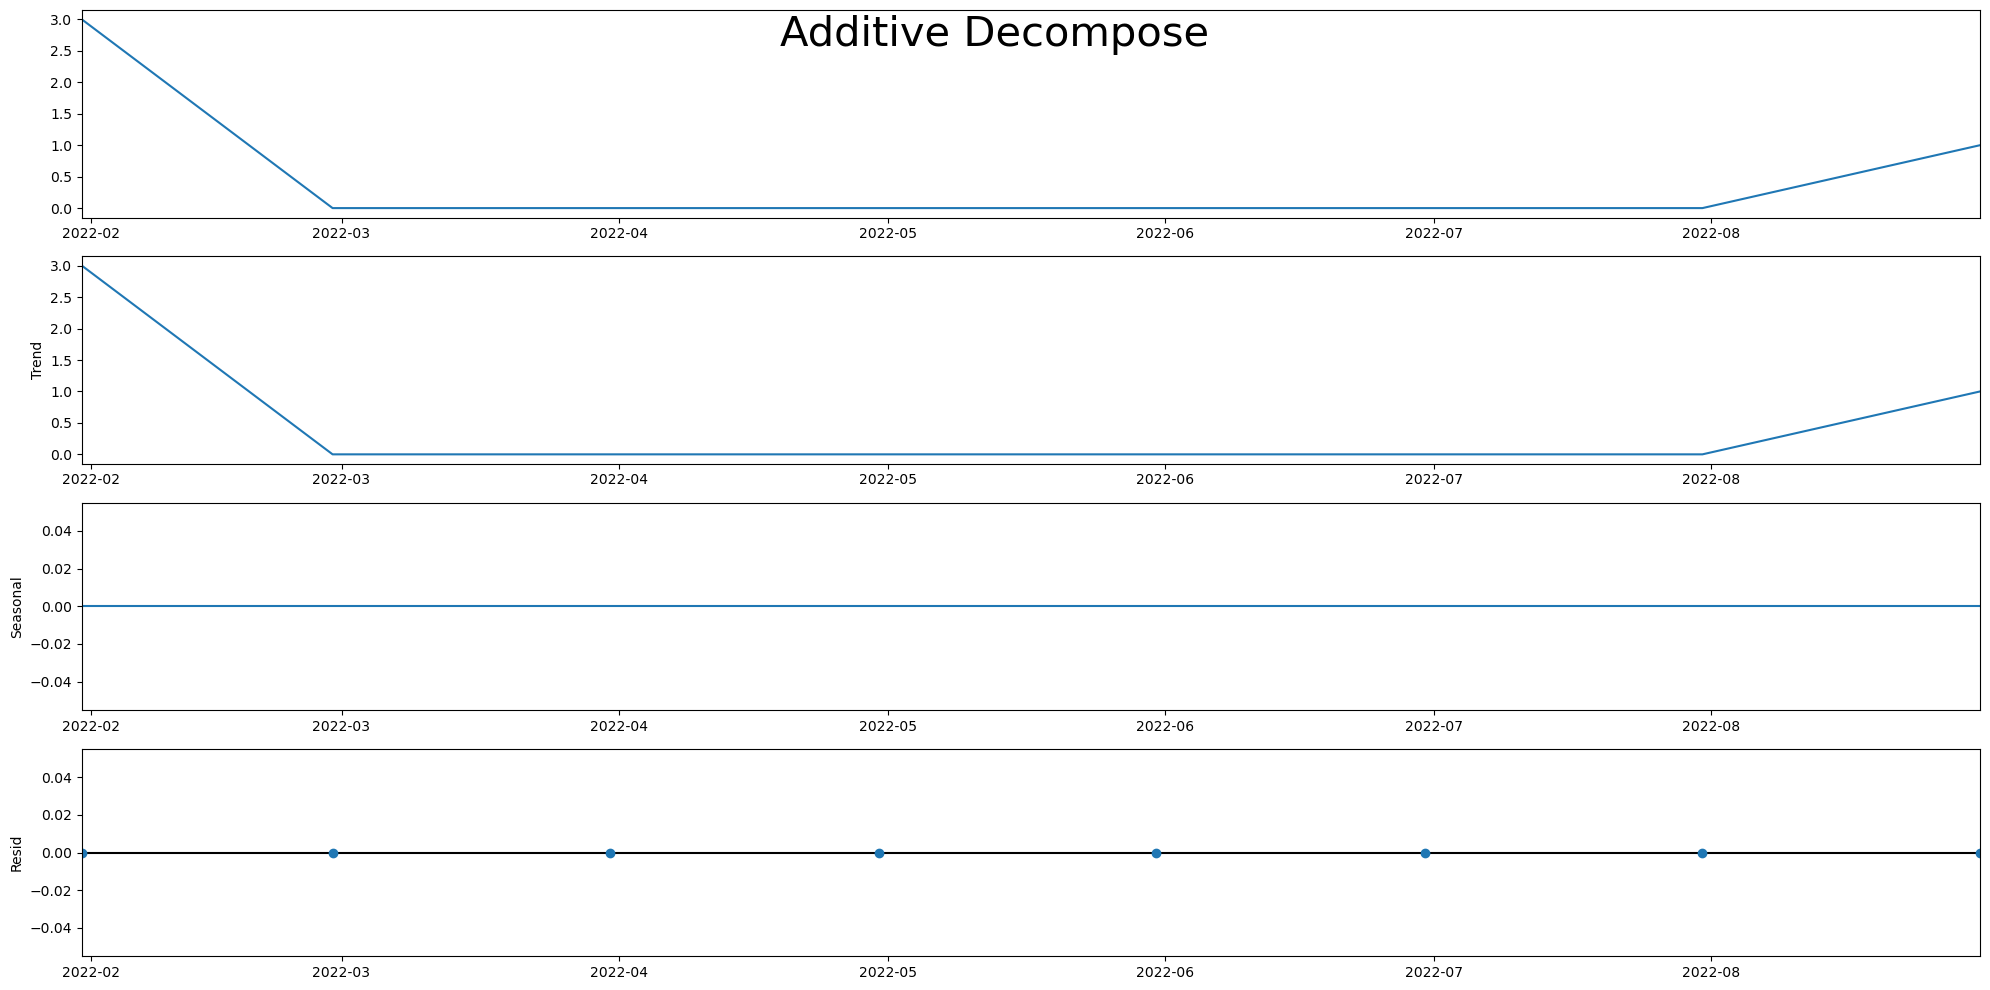

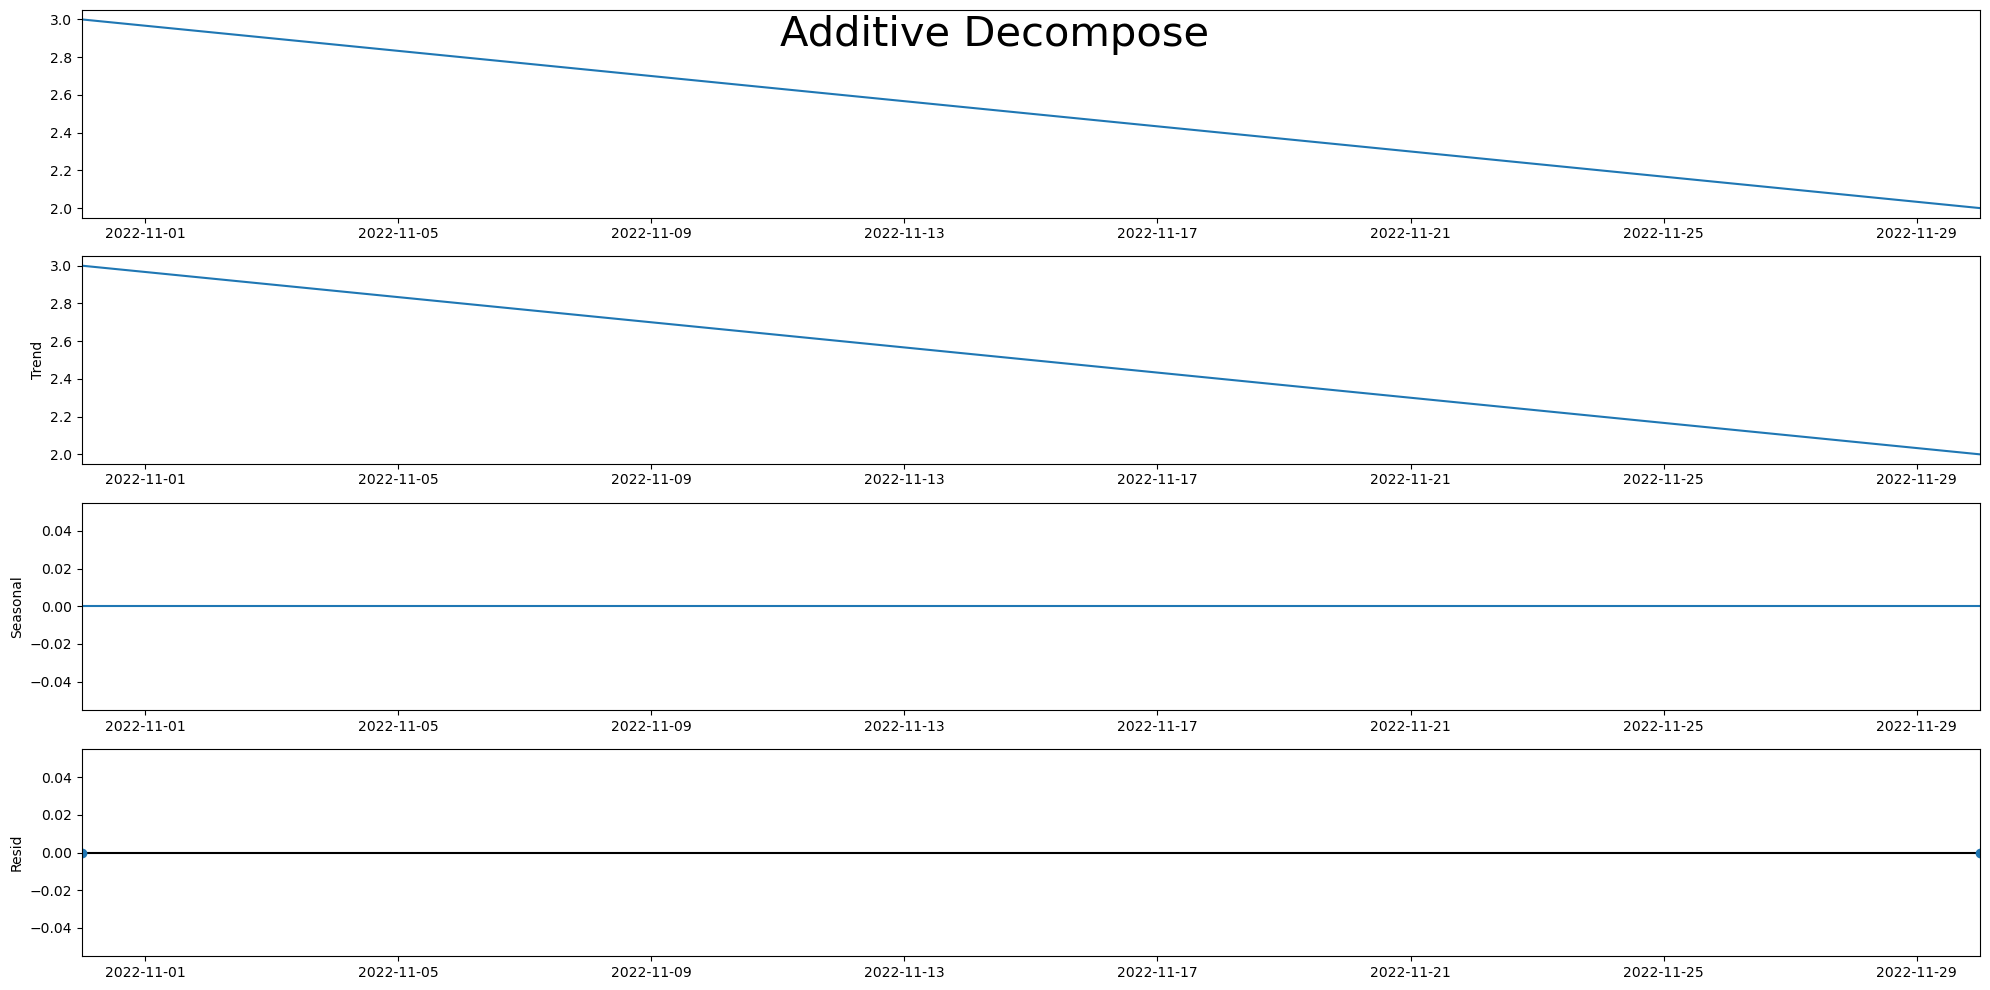

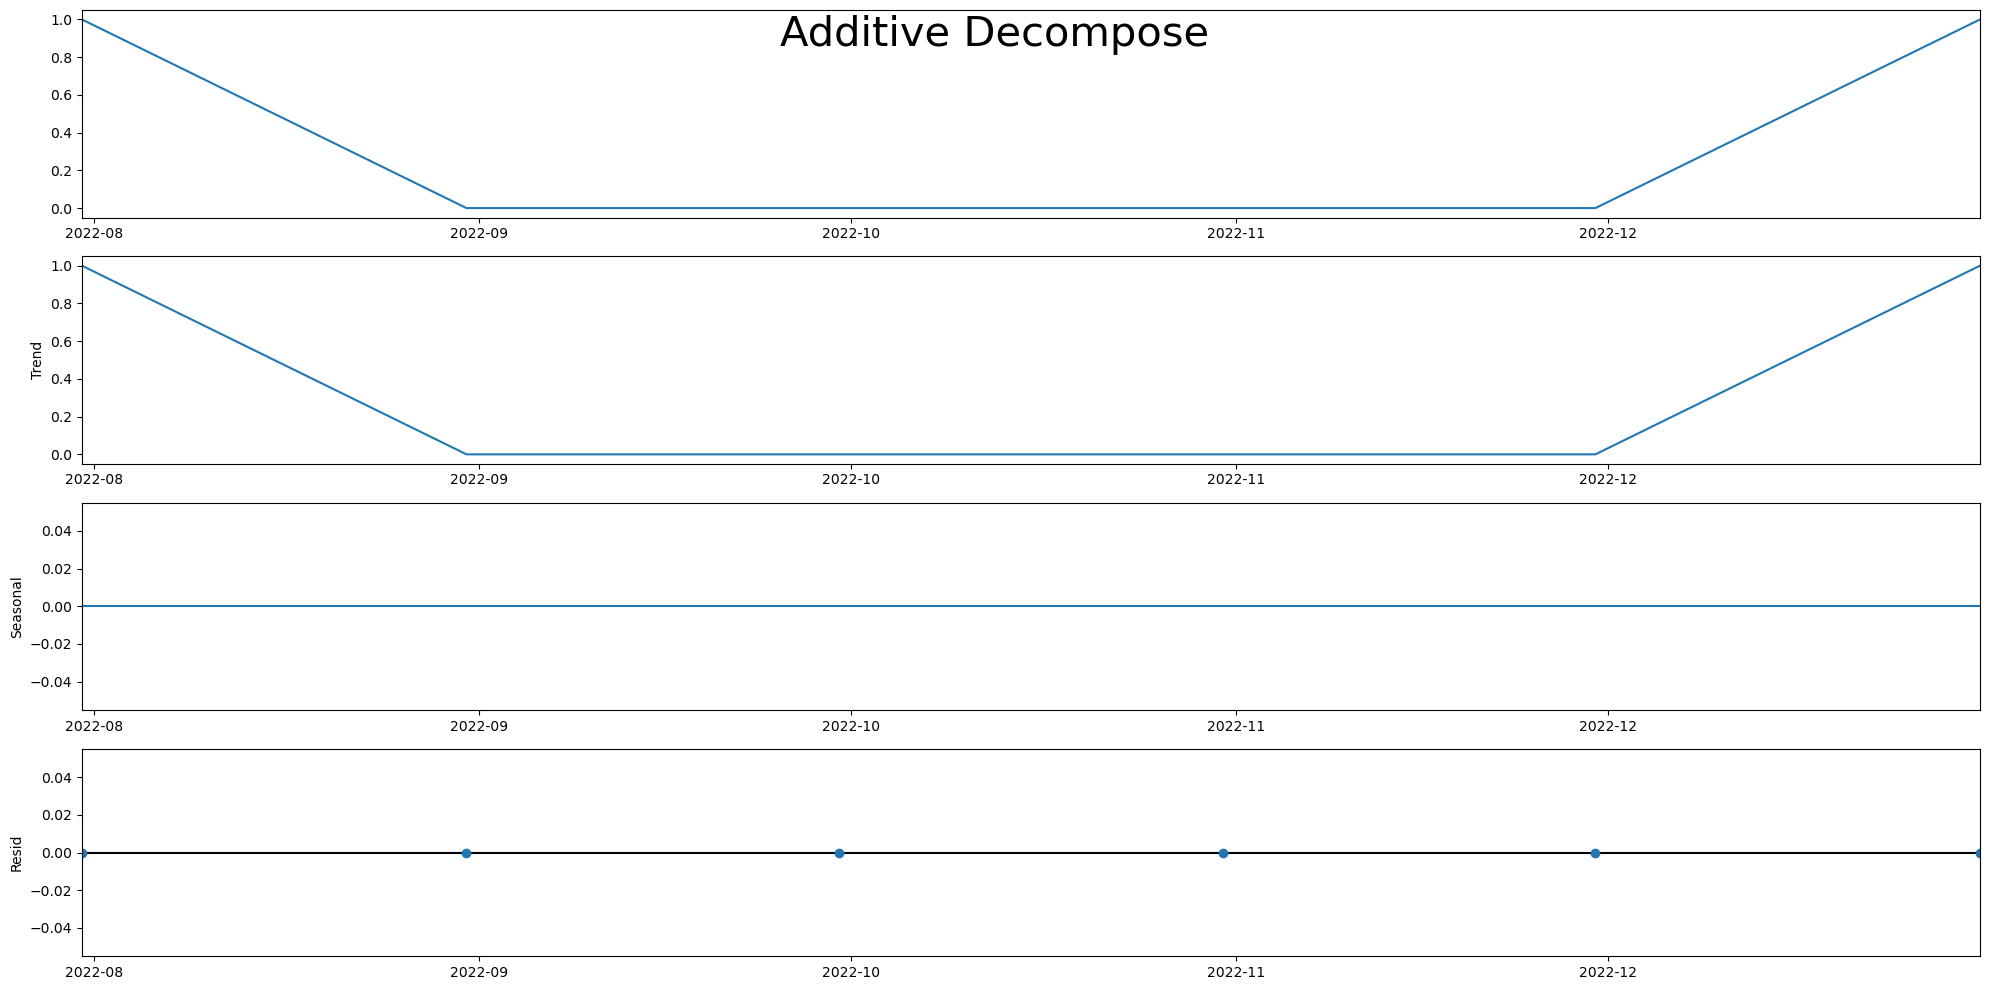

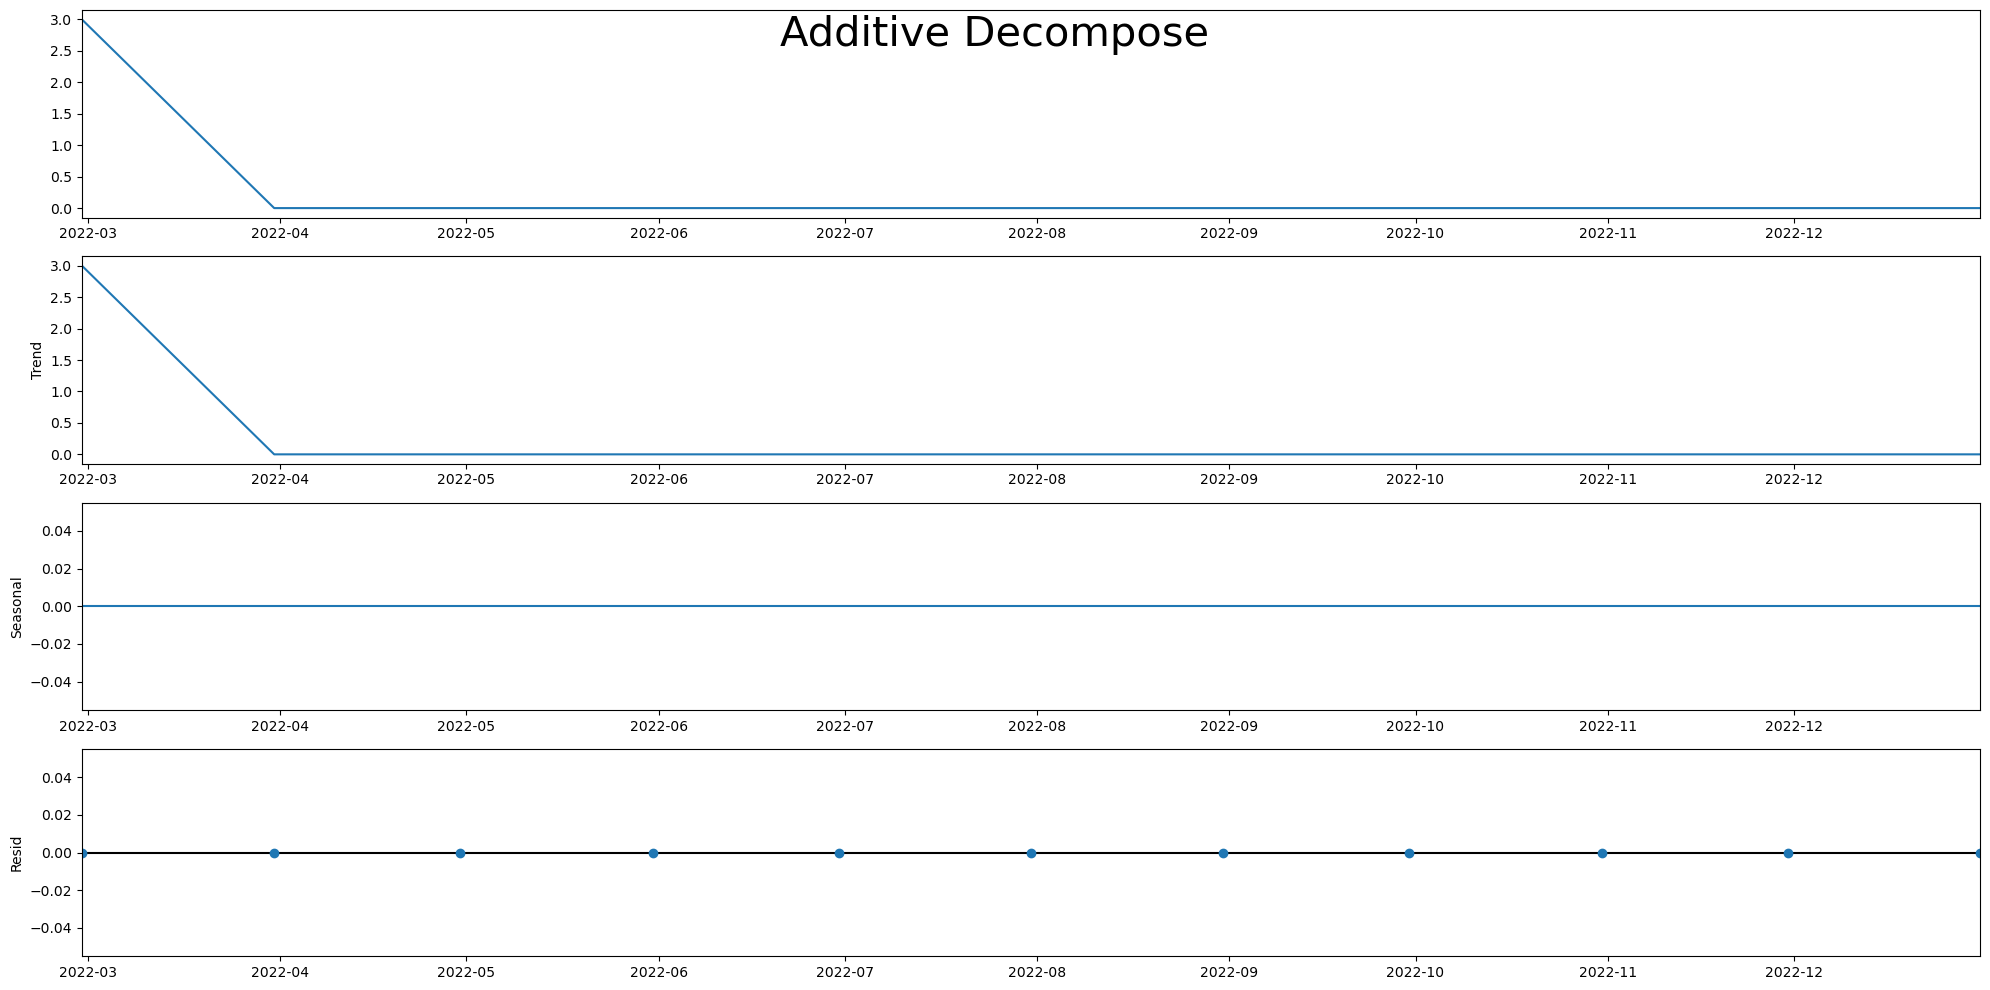

In [25]:
decompose(A)
decompose(A1)
decompose(A2)
decompose(A3)
#decompose(A4)